# 1. 결정트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split( iris_data.data, iris_data.target, 
                                                     test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit( X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

In [2]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz() 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함.
export_graphviz( dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                 feature_names= iris_data.feature_names, impurity=True, filled=True)

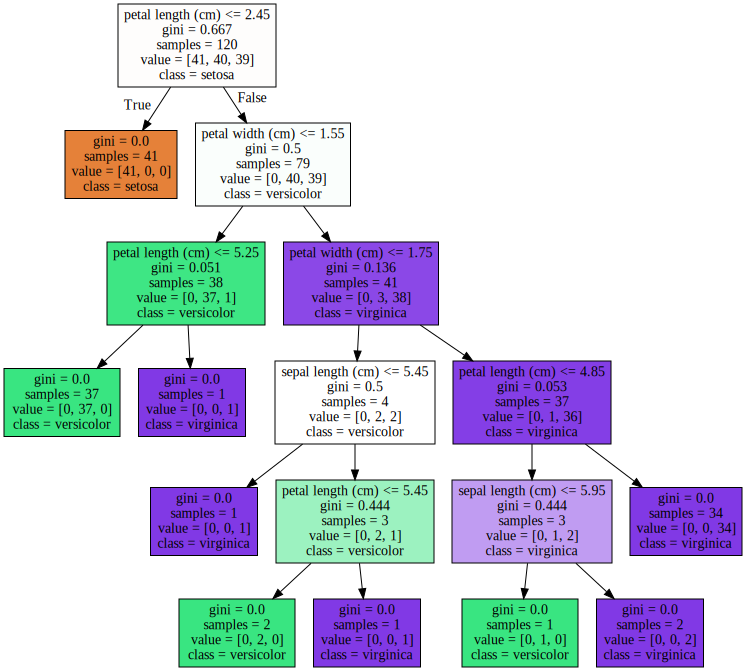

In [5]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br><br>
## 결정트리의 max_depth 하이퍼 파라미터 변경에 따른 트리변화

예측정확도: 0.9333


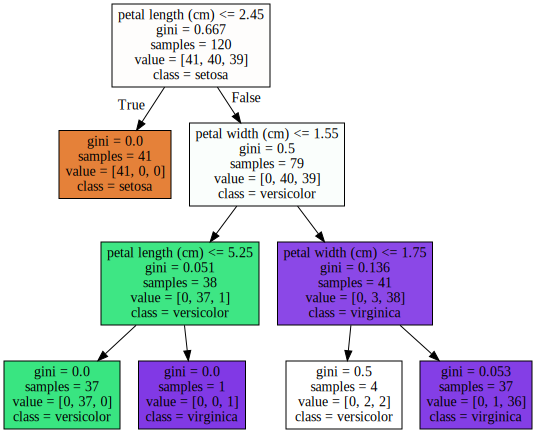

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

# DecisionTree Classifier 생성
# DecisionTree의 max_depth 하이퍼 파라미터 변겅
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split( iris_data.data, iris_data.target, 
                                                     test_size=0.2, random_state=11)
# DecisionTreeClassifier 학습
dt_clf.fit( X_train, y_train)

#학습후 X_test 데이터를 입력으로 예측 수행
pred= dt_clf2.predict(X_test)

# 예측레이블과 실제레이블(y_test) 비교 => 정확도 측정
accuracy= accuracy_score(y_test, pred)
print('예측정확도: {:.4f}'.format(accuracy))

# export_graphviz() 호출 결과로 out_file 로 지정된 tree2.dot 파일을 생성함.
export_graphviz( dt_clf, out_file='tree2.dot', class_names=iris_data.target_names,
                 feature_names= iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree2.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br><br><br>
## min_samples_split 하이퍼파라미터 변경에 따른 트리의 변화

min_samples_split : 자식규칙노드를 분할해서 만들기 위한 최소한의 샘플데이터 개수
<br>

samples 값이 min_smples_split값(4)보다 작으면 리프노드(말단노드)취급.

예측정확도: 0.9333


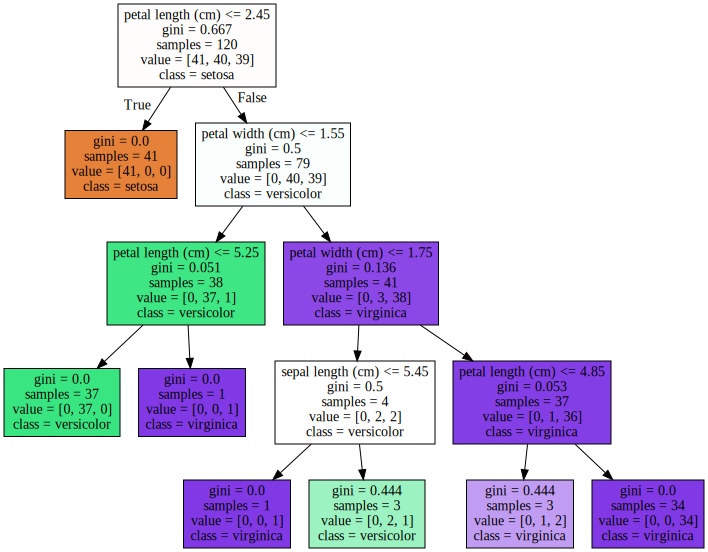

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

# DecisionTree Classifier 생성
# DecisionTree의 max_depth 하이퍼 파라미터 변겅
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split( iris_data.data, iris_data.target, 
                                                     test_size=0.2, random_state=11)
# DecisionTreeClassifier 학습
dt_clf.fit( X_train, y_train)

#학습후 X_test 데이터를 입력으로 예측 수행
pred= dt_clf.predict(X_test)

# 예측레이블과 실제레이블(y_test) 비교 => 정확도 측정
accuracy= accuracy_score(y_test, pred)
print('예측정확도: {:.4f}'.format(accuracy))

# export_graphviz() 호출 결과로 out_file 로 지정된 tree2.dot 파일을 생성함.
export_graphviz( dt_clf, out_file='tree3.dot', class_names=iris_data.target_names,
                 feature_names= iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree2.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br>
<br>

## min_samples_leaf 하이퍼 파라미터 변경에 따른 결정 트리의 변화

min_samples_leaf: 리프노드가 될 수 있는 **샘플데이터 건수의 최솟값**을 지정.

단독 클래스만 돼있거나 한개의 데이터로 돼 있을 경우에는 리프노드가 될 수 있다.

samples가 4 이하이면 리프노드가 된다. 

지니 계수값이 크더라도 샘플이 4인 조건으로 규칙 변경을 선호.

브랜치 노드가 줄어들고 결정트리가 더 간결하게 됨.

예측정확도: 0.9333


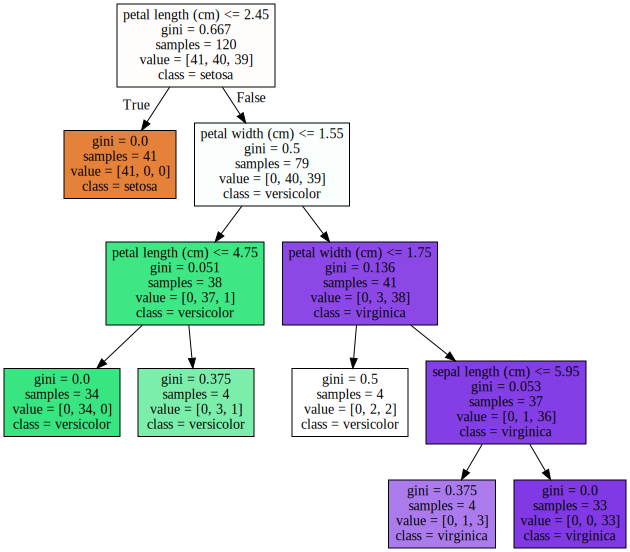

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz

# DecisionTree Classifier 생성
# DecisionTree의 max_depth 하이퍼 파라미터 변겅
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split( iris_data.data, iris_data.target, 
                                                     test_size=0.2, random_state=11)
# DecisionTreeClassifier 학습
dt_clf.fit( X_train, y_train)

#학습후 X_test 데이터를 입력으로 예측 수행
pred= dt_clf.predict(X_test)

# 예측레이블과 실제레이블(y_test) 비교 => 정확도 측정
accuracy= accuracy_score(y_test, pred)
print('예측정확도: {:.4f}'.format(accuracy))

# export_graphviz() 호출 결과로 out_file 로 지정된 tree2.dot 파일을 생성함.
export_graphviz( dt_clf, out_file='tree3.dot', class_names=iris_data.target_names,
                 feature_names= iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree2.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br><br>

## feature_importances_ 속성

결정트리 알고리즘이 학습을 통해 규칙을 정하는데 있어

**feature의 중요한 역할 지표**를 제공.

feature별 중요도 값을 매핑

Feature Importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


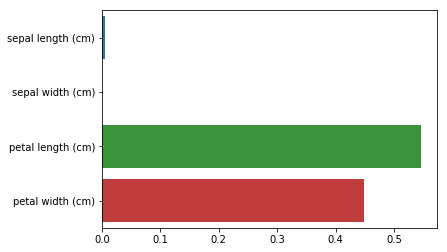

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# feature importance 추추
print('Feature Importances:\n{}'.format(np.round(dt_clf.feature_importances_, 3)) )

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)


<br><br>

# 결정트리 과적합(Overfitting)

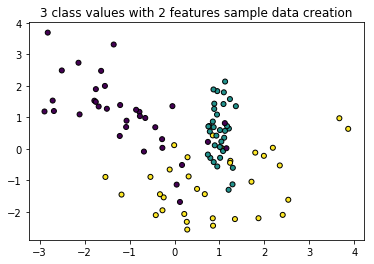

In [32]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

# 2차원 시각화를 위해서 feature은 2개, class는 3가지 유형의 분류 샘플데이터 생성
X_features, y_labels= make_classification( n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter( X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

점 색깔: 클래스 종류<br>
특징: x축, y축

In [25]:
# plot_data 다운
!pip install plot_data

  ERROR: Could not find a version that satisfies the requirement plot_data (from versions: none)
ERROR: No matching distribution found for plot_data


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def visualize_boundary(model, X,y):
    fig, ax = plt.subplots()
    
    # 학습데이터 scatter plot으로 나타내기
    ax.scatter( X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', 
               edgecolor='k', clim=(y.min(), y.max()), zorder=3 )
    
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model학습
    model.fit(X,y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid( np.linspace( xlim_start, xlim_end, num=200), 
                          np.linspace( ylim_start, ylim_end, num=200))
    Z= model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary를 visualization  수행
    n_classes= len(np.unique(y))
    contours= ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5,
                          cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

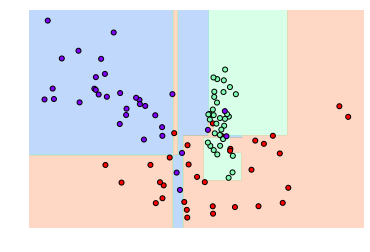

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary( dt_clf, X_features, y_labels)

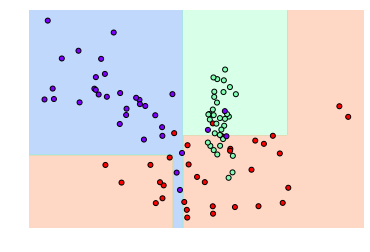

In [45]:
# max_depth=3으로 설정
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_features, y_labels)
visualize_boundary( dt_clf, X_features, y_labels)

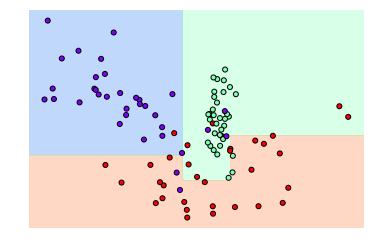

In [42]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary( dt_clf, X_features, y_labels)